### Exercise 5 : Classification Tree

#### Problem 1 : Predicting CentralAir using SalePrice
In this problem, you will build a Classification Tree model to predict CentralAir using SalePrice and judge its accuracy.

In [178]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

In [179]:
data = pd.read_csv('train.csv')
saleprice = pd.DataFrame(data['SalePrice'])
centralair = pd.DataFrame(data['CentralAir'])


 a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit two Classification Tree models (of max 
depth 2 and max depth 4) on the Train set to predict CentralAir using SalePrice. Print the tree in each case.

In [180]:
#define a function that help us to split any dataframes into train and set
#def trainAndTest(predictor,response,testSize = 0.2):
    #x_train,y_train,x_test,y_test = train_test_split(predictor,response,test_size = testSize)
    #return (x_train,y_train,x_test,y_test)

#tuple[0] == x_train
#tuple[1] == y_train
#tuple[2] == x_test
#tuple[3] == y_test
#print("Train set\t:",tuple[0].shape, tuple[1].shape)
#print("Test set\t:",tuple[2].shape, tuple[3].shape)

##### Using saleprice_train as Predictor and centralair_train as Response

In [181]:
#we split the datasets into train and test sets in a random 80:20 ratio
saleprice_train,saleprice_test,centralair_train,centralair_test = train_test_split(saleprice,centralair,test_size = 0.2)

#we will print out the number of datapoints in each sets to verify it
print("DATA SET\t[{0},{1}]".format("centralAir","SalePrice"))
print("Train set\t:{0},{1}".format(centralair_train.shape,saleprice_train.shape))
print("Test set\t:{0},{1}".format(centralair_test.shape,saleprice_test.shape))


DATA SET	[centralAir,SalePrice]
Train set	:(1168, 1),(1168, 1)
Test set	:(292, 1),(292, 1)


<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

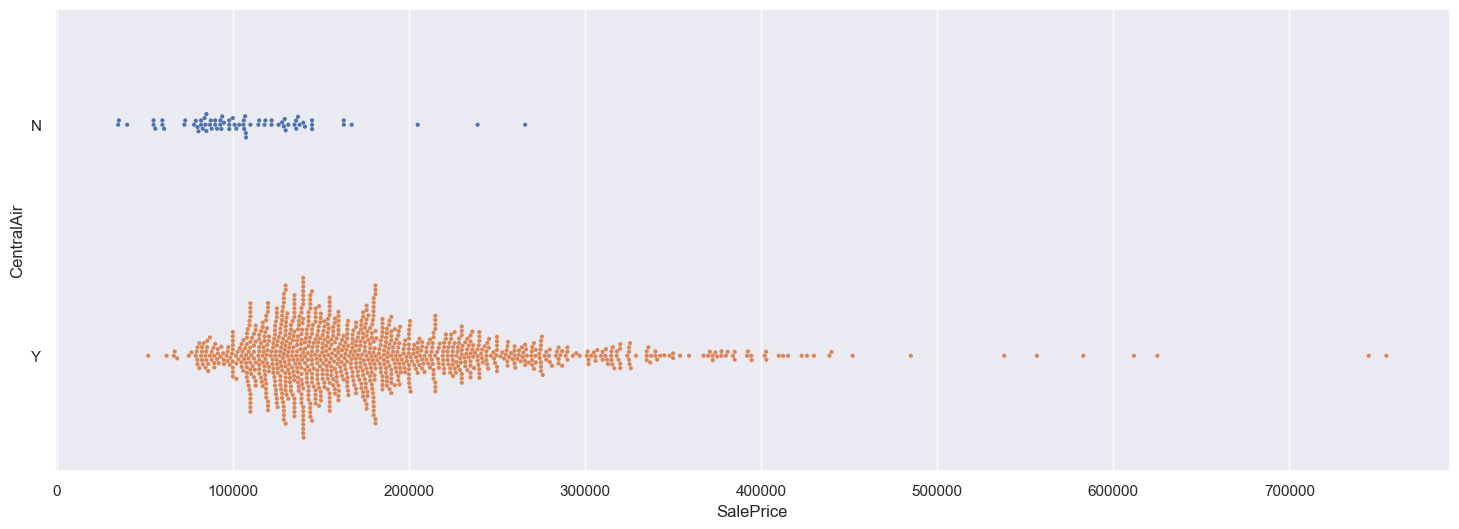

In [182]:
trainDF = pd.concat([saleprice_train,centralair_train], axis = 1).reindex(saleprice_train.index)
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = trainDF, orient = "h", s = 3)

Conclusion drawn from this swarmplot : <br>
By analyzing this swarmplot, we can see that building without "CentralAir" will not be able to fetch greater than $300000 in "SalePrice" . Similarly, buildings with "centralAir" has higher command of "SalePrice" as compared to buildings without. However, this analysis is done on a visual level, we will do further analysis by using decision tree & confusion matrix to help us decide if "SalePrice" has a mutual relationship with "CentralAir".


## Decision Tree & Confusion Matrix to determine "salePrice" & "CentralAir" relationship

### Decision Trees (max_depth = 2 & 4)

In [183]:
# Create a Decision Tree Classifier object
dectree_depth2 = DecisionTreeClassifier(max_depth = 2)
dectree_depth4 = DecisionTreeClassifier(max_depth = 4)
# Train the Decision Tree Classifier model
dectree_depth2.fit(saleprice_train,centralair_train)
dectree_depth4.fit(saleprice_train,centralair_train)

DecisionTreeClassifier(max_depth=4)

#### Decision Tree with max_depth = 2

[Text(0.5, 0.8333333333333334, 'SalePrice <= 107700.0\ngini = 0.12\nsamples = 1168\nvalue = [75, 1093]\nclass = Yes Central'),
 Text(0.25, 0.5, 'SalePrice <= 61691.5\ngini = 0.465\nsamples = 125\nvalue = [46, 79]\nclass = Yes Central'),
 Text(0.125, 0.16666666666666666, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = No Central '),
 Text(0.375, 0.16666666666666666, 'gini = 0.436\nsamples = 115\nvalue = [37, 78]\nclass = Yes Central'),
 Text(0.75, 0.5, 'SalePrice <= 145125.0\ngini = 0.054\nsamples = 1043\nvalue = [29, 1014]\nclass = Yes Central'),
 Text(0.625, 0.16666666666666666, 'gini = 0.127\nsamples = 338\nvalue = [23, 315]\nclass = Yes Central'),
 Text(0.875, 0.16666666666666666, 'gini = 0.017\nsamples = 705\nvalue = [6, 699]\nclass = Yes Central')]

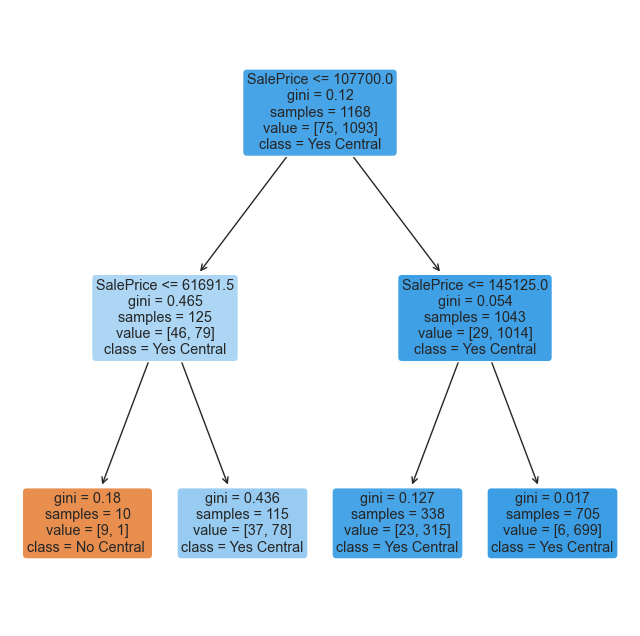

In [184]:
f = plt.figure(figsize=(8,8))
plot_tree(dectree_depth2, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No Central ","Yes Central"])


#### Decision Tree with max_depth = 4

[Text(0.4791666666666667, 0.9, 'SalePrice <= 107700.0\ngini = 0.12\nsamples = 1168\nvalue = [75, 1093]\nclass = Yes Central'),
 Text(0.22916666666666666, 0.7, 'SalePrice <= 61691.5\ngini = 0.465\nsamples = 125\nvalue = [46, 79]\nclass = Yes Central'),
 Text(0.125, 0.5, 'SalePrice <= 53500.0\ngini = 0.18\nsamples = 10\nvalue = [9, 1]\nclass = No Central '),
 Text(0.08333333333333333, 0.3, 'SalePrice <= 46000.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = No Central '),
 Text(0.041666666666666664, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No Central '),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes Central'),
 Text(0.16666666666666666, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = No Central '),
 Text(0.3333333333333333, 0.5, 'SalePrice <= 105950.0\ngini = 0.436\nsamples = 115\nvalue = [37, 78]\nclass = Yes Central'),
 Text(0.25, 0.3, 'SalePrice <= 98150.0\ngini = 0.418\nsamples = 104\nvalue = [31, 73]\nclass = Yes Central'),
 Text(0

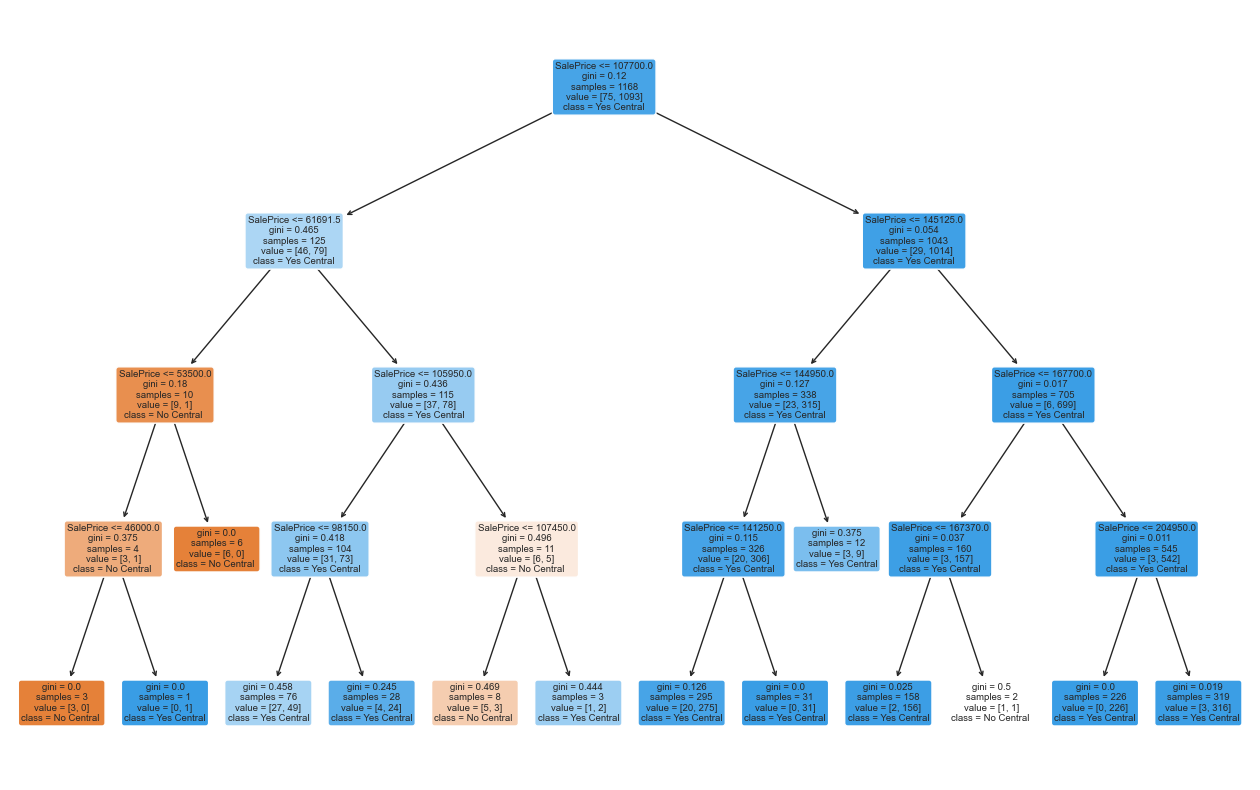

In [187]:
f = plt.figure(figsize=(16,10))
plot_tree(dectree_depth4, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No Central ","Yes Central"])

### Confusion Matrix on train & test sets